# **Proyek Analisis Data: E-Commerce Public Dataset**

Nama: Ni Luh Gede Midya Frangginie

Email: midyafannie@gmail.com


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Menentukan Pertanyaan Bisnis

Pertanyaan bisnis yang akan dianalisa

- Bagaimana performa penjualan perusahaan?
- Produk apa yang paling banyak dan paling sedikit terjual?
- jenis pembayaran apa yang paling sering digunakan?
- Bagaimana performa pengiriman barang?
- Bagaimana demografi persebaran lokasi pelanggan?
- Kapan terakhir kali pelanggan melakukan transaksi?
- Bagaimana frekuensi pelanggan dalam melakukan pembelian dalam beberapa bulan terakhir?
- Seberapa banyak uang yang dihabiskan pelanggan untuk berbelanja dalam beberapa tahun?

# Data Wrangling

## Gathering Data

In [ ]:
customers_df = pd.read_csv("/content/drive/My Drive/E-Commerce Public Dataset/customers_dataset.csv")
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
geolocation_df = pd.read_csv("/content/drive/My Drive/E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation_df.head(20)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [ ]:
order_item_df = pd.read_csv("/content/drive/My Drive/E-Commerce Public Dataset/order_items_dataset.csv")
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_item_df.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


In [ ]:
order_payment_df = pd.read_csv("/content/drive/My Drive/E-Commerce Public Dataset/order_payments_dataset.csv")
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_reviews_df = pd.read_csv("/content/drive/My Drive/E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
order_df = pd.read_csv("/content/drive/My Drive/E-Commerce Public Dataset/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
product_category_df = pd.read_csv("/content/drive/My Drive/E-Commerce Public Dataset/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
product_df = pd.read_csv("/content/drive/My Drive/E-Commerce Public Dataset/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers_df = pd.read_csv("/content/drive/My Drive/E-Commerce Public Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Asessing Data

### Checking Customers Data

In [ ]:
#checking the customers data
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
#checking null data
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
#checking duplicate data
print("Duplicate Data: ", customers_df.duplicated().sum())


Duplicate Data:  0


In [ ]:
#describing data
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


data is clean

### Checking Geolocations Data

In [ ]:
#checking the geolocation data
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
#checking null data
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [ ]:
#checking duplicate data
#print("Duplicate Data: ", geolocation_df().duplicated(['geolocation_zip_code_prefix']).sum())
duplicateRows = geolocation_df[geolocation_df.duplicated(['geolocation_zip_code_prefix'])]
print(duplicateRows)

         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
2                               1046       -23.546129       -46.642951   
10                              1013       -23.547325       -46.634184   
13                              1012       -23.548946       -46.634671   
14                              1037       -23.545187       -46.637855   
15                              1046       -23.546081       -46.644820   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
2              sao paulo                SP  
10             sao pa

there is many different longitude and latitude for one states, dont delete the duplicate data

In [ ]:
#describing data
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### Checking Order Item

In [ ]:
#checking the geolocation data
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
#checking null data
order_item_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
#checking duplicate data
print("Duplicate Data: ", order_item_df.duplicated().sum())


Duplicate Data:  0


In [ ]:
#describing
order_item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Checking Order Payments

In [ ]:
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
#checking duplicate data
print("Duplicate Data: ", order_payment_df.duplicated().sum())


Duplicate Data:  0


In [ ]:
order_payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Checking Order Reviews

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
#checking duplicate data
print("Duplicate Data: ", order_reviews_df.duplicated().sum())


Duplicate Data:  0


In [ ]:
order_payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Checking Orders

In [ ]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
order_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,18.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,27.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,26.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,12.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,19.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,23.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,30.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,37.0


In [ ]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
#checking duplicate data
print("Duplicate Data: ", order_df.duplicated().sum())


Duplicate Data:  0


In [ ]:
order_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Checking Product Category

In [ ]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [ ]:
#checking duplicate data
print("Duplicate Data: ", product_category_df.duplicated().sum())


Duplicate Data:  0


In [ ]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Checking Products Dataset

In [ ]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
#checking duplicate data
print("Duplicate Data: ", product_category_df.duplicated().sum())


Duplicate Data:  0


In [ ]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Checking Sellers Dataset

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [ ]:
#checking duplicate data
print("Duplicate Data: ", sellers_df.duplicated().sum())


Duplicate Data:  0


In [ ]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


## Cleaning Data

### drop duplicaates geolocation

dropping duplicates data on geolocation, because one zip code could only have one latitude and longitude

In [ ]:
geolocation_df.drop_duplicates(subset=['geolocation_zip_code_prefix'],inplace=True)
print("Duplicate Data: ", geolocation_df.duplicated().sum())

Duplicate Data:  0


In [ ]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,19015.000000,19015.000000,19015.000000
mean,42711.591901,-19.062087,-46.058008
std,30905.051745,7.319402,5.380751
min,1001.000000,-36.605374,-72.927296
25%,12721.500000,-23.564386,-49.000445
50%,38240.000000,-22.429252,-46.632544
75%,70656.500000,-15.615448,-43.255324
max,99990.000000,42.184003,121.105394


### Dropping null values from product category

In [ ]:
#dropping null values from product category
new_product = product_df.dropna()

In [ ]:
new_product.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [ ]:
#
customers_df[customers_df.customer_zip_code_prefix == customers_df.customer_zip_code_prefix.max()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
25752,f04c3f6e20a2a4318d97d7cec1d27bbf,8f846b30f8f56368cd1bf4c89efeed74,99990,muliterno,RS


In [ ]:
#
geolocation_df[geolocation_df.geolocation_zip_code_prefix == geolocation_df.geolocation_zip_code_prefix.max()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
999758,99990,-28.329718,-51.769615,muliterno,RS


In [ ]:
#
customers_df[customers_df.customer_zip_code_prefix == customers_df.customer_zip_code_prefix.min()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
23914,7ae2a9337aa4bc799723511faa1d6830,0c1a20644f0dc126c3eaff8dbc1bd12c,1003,sao paulo,SP


In [ ]:
#
geolocation_df[geolocation_df.geolocation_zip_code_prefix == geolocation_df.geolocation_zip_code_prefix.min()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
99,1001,-23.549292,-46.633559,sao paulo,SP


### Changing false data type

In [ ]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  order_df[column] = pd.to_datetime(order_df[column])

In [ ]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


# EDA

Pertanyaan yang akan dijawab

- Bagaimana performa penjualan perusahaan?
- jenis pembayaran apa yang paling sering digunakan
- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana performa pengiriman barang?
- Bagaimana demografi persebaran lokasi pelanggan?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

Berikut adalah proses **Eksporasi** terhadap data

In [ ]:
order_payment_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [ ]:
order_payment_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
#using pivot table to see payments with the payment type
order_payment_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["max", "min", "mean", "std"]
})

order_id payment_value                               
              nunique           max    min        mean         std
payment_type                                                      
boleto          19784       7274.88  11.62  145.034435  213.581061
credit_card     76505      13664.08   0.01  163.319021  222.119311
debit_card       1528       4445.50  13.38  142.570170  245.793401
not_defined         3          0.00   0.00    0.000000    0.000000
voucher          3866       3184.34   0.00   65.703354  115.519185

pembayaran terbanyak adalah dengan menggunakan **Credit Card** kemudian **Boleto**

"A ‘boleto’ is a printed or virtual voucher with a barcode, payment details, and customer information"

> Indented block



In [ ]:
#join orders and payment
orders_payment_df = pd.merge(
    left=order_df,
    right=order_payment_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_payment_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,18.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,27.0,1.0,credit_card,3.0,179.12


In [ ]:

customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [ ]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [ ]:
#adding delivery_time row
delivery_time = order_df["order_estimated_delivery_date"] - order_df["order_approved_at"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_df["delivery_time"] = round(delivery_time/86400)
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,18.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,27.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,26.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,12.0


In [ ]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   delivery_time                  99281 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 6.8+ MB


In [ ]:
order_df.describe(include="all")

<ipython-input-26-bc0d6a874b43>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df.describe(include="all")
<ipython-input-26-bc0d6a874b43>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df.describe(include="all")
<ipython-input-26-bc0d6a874b43>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df.describe(include="all")
<ipython-input-26-bc0d6a874b43>:1: FutureWarning:

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,99281.000000
unique,99441,99441,8,98875,90733,81018,95664,459,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00,NaN
freq,1,1,96478,3,9,47,3,522,NaN
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,NaN
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.280547
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.855584
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-146.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000


In [ ]:
customer_id_in_orders_df =  order_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active


In [ ]:
customers_df.groupby(by="status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

Ditemukan bahwa **Seluruh Pemilik akun setidaknya pernah melakukan transaksi atau "Aktif"**

In [ ]:
#join orders and customer
orders_customers_df = pd.merge(
    left=orders_payment_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,18.0,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,27.0,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active


In [ ]:
#membersihkan kolom yang tidak perlu
orders_customers_df.drop(["payment_sequential","payment_installments"], axis = 1, inplace = True)

In [ ]:
#order berdasarkan kota
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


Ditemukan bahwa order terbanyak berasal dari kota **sao paulo**

In [ ]:
orders_customers_df.groupby(by="order_status").customer_id.count()

order_status
approved            2
canceled          664
created             5
delivered      100757
invoiced          325
processing        319
shipped          1166
unavailable       649
Name: customer_id, dtype: int64

pesanan banyak yang sudah berstatus **delivered** namun masih terdapat pesanan yang **canceled** dan **unavailable**

In [ ]:
#menggabungkan order dan penjualan

sales_product_df = pd.merge(
    left=order_df,
    right=order_item_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
sales_product_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,18.0,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,27.0,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,26.0,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,12.0,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [ ]:
#menggabungkan order, penjualan dan produk

sales_product_det_df = pd.merge(
    left=sales_product_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_product_det_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   delivery_time                  113264 non-null  float64       
 9   order_item_id                  112650 non-null  float64       
 10  product_id                     112650 non-null  object        
 11  

In [ ]:
#menggabungkan order, penjualan dan kategori produk

sales_product_fin_df = pd.merge(
    left=sales_product_det_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
sales_product_fin_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,1.0,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,18.0,1.0,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,27.0,1.0,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,26.0,1.0,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,12.0,1.0,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


In [ ]:
sales_product_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   delivery_time                  113264 non-null  float64       
 9   order_item_id                  112650 non-null  float64       
 10  product_id                     112650 non-null  object        
 11  

In [ ]:
#cleaning final sales data
sales_product_fin_df.drop(["product_category_name","freight_value","product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm","product_width_cm"], axis = 1, inplace = True)

In [ ]:
sales_product_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   delivery_time                  113264 non-null  float64       
 9   order_item_id                  112650 non-null  float64       
 10  product_id                     112650 non-null  object        
 11  

In [ ]:
sales_product_fin_df.describe(include="all")

<ipython-input-90-df1b5a151a45>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  sales_product_fin_df.describe(include="all")
<ipython-input-90-df1b5a151a45>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  sales_product_fin_df.describe(include="all")
<ipython-input-90-df1b5a151a45>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  sales_product_fin_df.describe(include="all")
<ipython-inpu

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_category_name_english
count,113425,113425,113425,113425,113264,111457,110196,113425,113264.000000,112650.000000,112650,112650,112650,112650.000000,112650.000000,111047,111047.000000,111047.000000,111023
unique,99441,99441,8,98875,90733,81018,95664,459,NaN,NaN,32951,3095,93318,NaN,NaN,73,NaN,NaN,71
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2018-02-24 03:20:27,2018-05-09 15:48:00,2017-07-31 18:03:02,2017-12-20 00:00:00,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,cama_mesa_banho,NaN,NaN,bed_bath_table
freq,21,21,110197,21,23,48,21,611,NaN,NaN,527,2033,21,NaN,NaN,11115,NaN,NaN,11115
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.334405,1.197834,NaN,NaN,NaN,120.653739,19.990320,NaN,48.775978,787.867029,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.911099,0.705124,NaN,NaN,NaN,183.633928,15.806405,NaN,10.025581,652.135608,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-146.000000,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,5.000000,4.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,42.000000,348.000000,NaN


In [ ]:
#melihat total pendapatan kotor dari seluruh kategori
sales_product_fin_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
#    "order_item_id": "nunique",
    "price": "sum"
})

,order_id,price
product_category_name_english,,
agro_industry_and_commerce,182,72530.47
air_conditioning,253,55024.96
art,202,24202.64
arts_and_craftmanship,23,1814.01
audio,350,50688.50
...,...,...
stationery,2311,230943.23
tablets_printing_image,79,7528.41
telephony,4199,323667.53


In [ ]:
all_df = pd.merge(
    left=sales_product_fin_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,delivery_time_x,order_item_id,...,order_delivered_customer_date_y,order_estimated_delivery_date_y,delivery_time_y,payment_type,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,1.0,...,2017-10-10 21:25:13,2017-10-18,16.0,credit_card,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,1.0,...,2017-10-10 21:25:13,2017-10-18,16.0,voucher,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,1.0,...,2017-10-10 21:25:13,2017-10-18,16.0,voucher,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,18.0,1.0,...,2018-08-07 15:27:45,2018-08-13,18.0,boleto,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,27.0,1.0,...,2018-08-17 18:06:29,2018-09-04,27.0,credit_card,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active


In [ ]:
all_df = pd.merge(
    left=all_df,
    right=geolocation_df,
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
all_df.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,delivery_time_x,order_item_id,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,1.0,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,3149.0,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,1.0,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,3149.0,-23.574809,-46.587471,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,1.0,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,3149.0,-23.574809,-46.587471,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,18.0,1.0,...,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active,47813.0,-12.169860,-44.988369,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,27.0,1.0,...,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active,75265.0,-16.746337,-48.514624,vianopolis,GO


In [ ]:
#cleaning final sales data
all_df.drop(["geolocation_zip_code_prefix","geolocation_city","geolocation_state"], axis = 1, inplace = True)

In [ ]:
#cleaning final sales data
all_df.drop(["customer_id_y","order_status_y","order_purchase_timestamp_y","order_approved_at_y","order_delivered_carrier_date_y","order_delivered_customer_date_y","order_estimated_delivery_date_y","delivery_time_y"], axis = 1, inplace = True)

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118434 entries, 0 to 118433
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   order_id                         118434 non-null  object        
 1   customer_id_x                    118434 non-null  object        
 2   order_status_x                   118434 non-null  object        
 3   order_purchase_timestamp_x       118434 non-null  datetime64[ns]
 4   order_approved_at_x              118258 non-null  datetime64[ns]
 5   order_delivered_carrier_date_x   116360 non-null  datetime64[ns]
 6   order_delivered_customer_date_x  115037 non-null  datetime64[ns]
 7   order_estimated_delivery_date_x  118434 non-null  datetime64[ns]
 8   delivery_time_x                  118258 non-null  float64       
 9   order_item_id                    117604 non-null  float64       
 10  product_id                       117604 non-

In [ ]:
all_df.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "order_item_id": "nunique",
    "price": "sum"
})

order_item_id    price
customer_state product_category_name_english                        
AC             auto                                       1   606.97
               baby                                       1   697.84
               bed_bath_table                             2   567.70
               books_general_interest                     1   633.80
               christmas_supplies                         1    69.90
...                                                     ...      ...
TO             sports_leisure                             2  5533.32
               stationery                                 1   276.80
               telephony                                  2  1268.12
               toys                                       2  1864.15
               watches_gifts                              3  5446.89

[1356 rows x 2 columns]

# Data Visualization & Explanatory Analysis

## Sales Performance


### **Pertanyaan 1:** Bagaimana performa penjualan perusahaan?

Creating monthly orders visualization

In [ ]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp_y').agg({
    "order_id": "nunique",
    "price": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "monthly revenue"
}, inplace=True)

monthly_orders_df

,order_purchase_timestamp_y,order_count,monthly revenue
0,2016-09,4,267.36
1,2016-10,324,49507.66
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,800,120312.87
5,2017-02,1780,247303.02
6,2017-03,2682,374344.30
7,2017-04,2404,359927.23
8,2017-05,3700,506071.14
9,2017-06,3245,433038.60


In [ ]:
#changing into month name
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp_y').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #changing format of order date to month name

In [ ]:
monthly_orders_df

,order_id,price
order_purchase_timestamp_y,,
September,4,267.36
October,324,49507.66
November,0,0.00
December,1,10.90
January,800,120312.87
February,1780,247303.02
March,2682,374344.30
April,2404,359927.23
May,3700,506071.14


In [ ]:
# divide into different dataframe based on the year
monthly_orders_2016 = monthly_orders_df.iloc[0:4]
monthly_orders_2017 = monthly_orders_df.iloc[4:16]
monthly_orders_2018 = monthly_orders_df.iloc[16:]

In [ ]:
monthly_orders_2016

,order_id,price
order_purchase_timestamp_y,,
September,4,267.36
October,324,49507.66
November,0,0.00
December,1,10.90


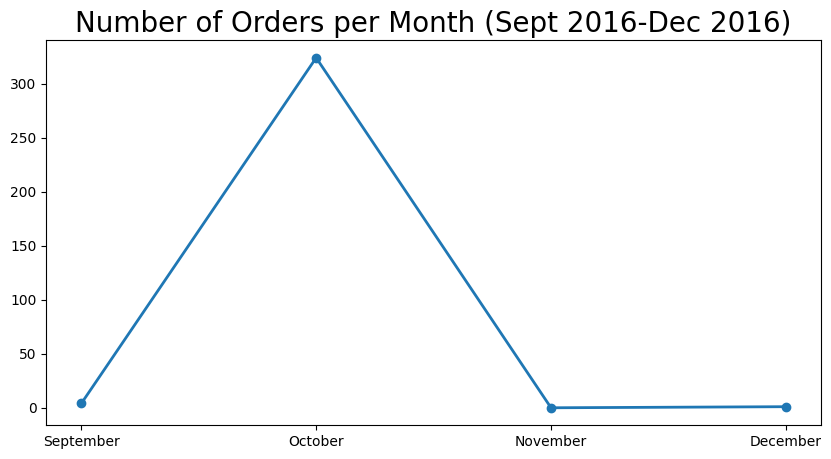

In [ ]:
#visualization
monthly_orders_2016 = monthly_orders_2016.reset_index()
monthly_orders_2016.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_2016["order_purchase_timestamp_y"], monthly_orders_2016["order_count"], marker='o', linewidth=2)
plt.title("Number of Orders per Month (Sept 2016-Dec 2016)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

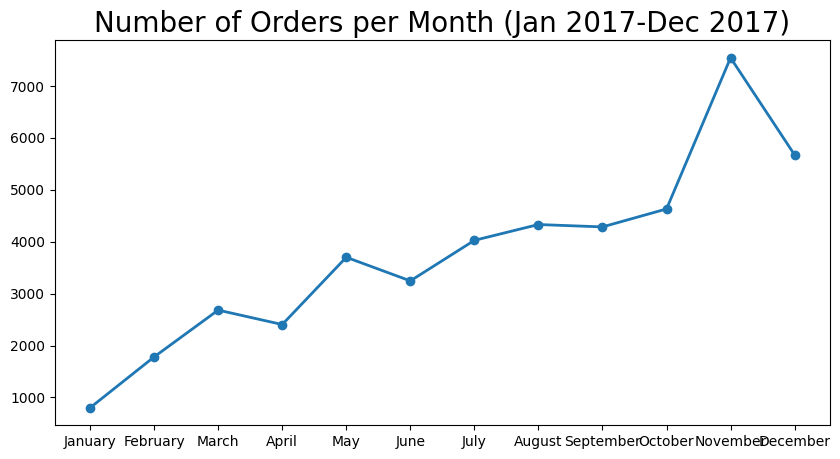

In [ ]:
#visualization
monthly_orders_2017 = monthly_orders_2017.reset_index()
monthly_orders_2017.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_2017["order_purchase_timestamp_y"], monthly_orders_2017["order_count"], marker='o', linewidth=2)
plt.title("Number of Orders per Month (Jan 2017-Dec 2017)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

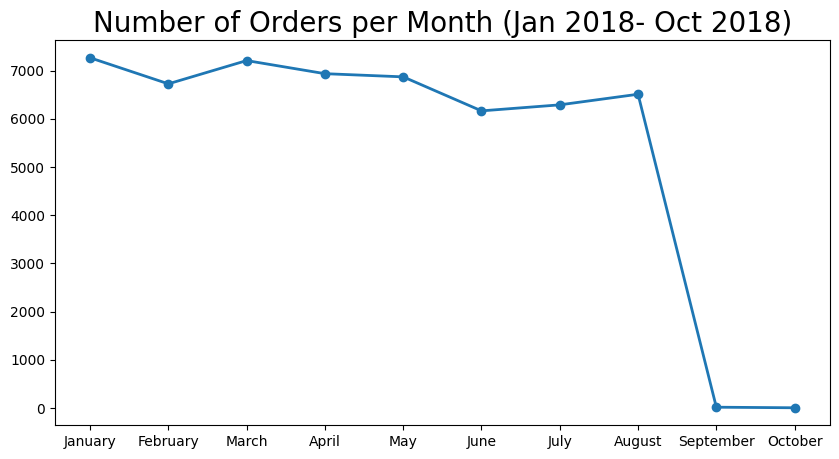

In [ ]:
#visualization
monthly_orders_2018 = monthly_orders_2018.reset_index()
monthly_orders_2018.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_2018["order_purchase_timestamp_y"], monthly_orders_2018["order_count"], marker='o', linewidth=2)
plt.title("Number of Orders per Month (Jan 2018- Oct 2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

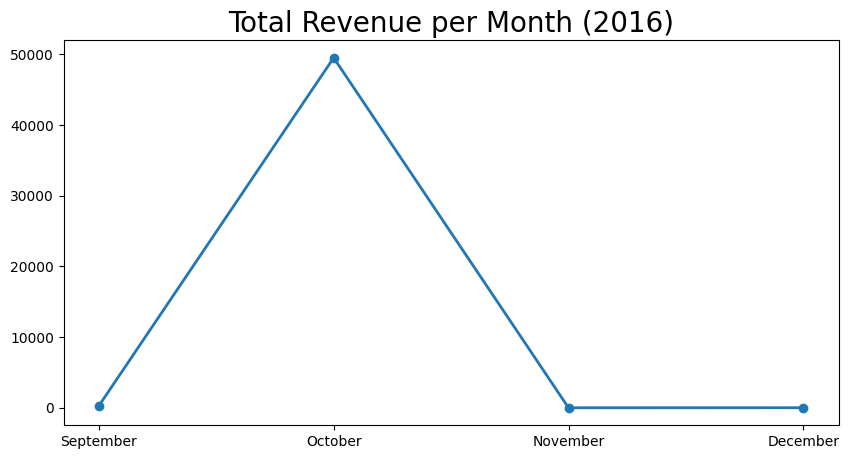

In [ ]:
# visualization of total revenue per month

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_2016["order_purchase_timestamp_y"],
    monthly_orders_2016["revenue"],
    marker='o',
    linewidth=2
)
plt.title("Total Revenue per Month (2016)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

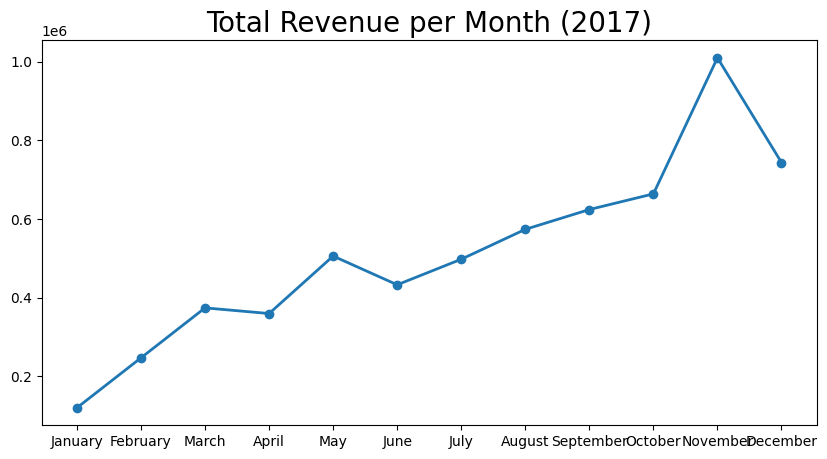

In [ ]:
# visualization of total revenue per month

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_2017["order_purchase_timestamp_y"],
    monthly_orders_2017["revenue"],
    marker='o',
    linewidth=2
)
plt.title("Total Revenue per Month (2017)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

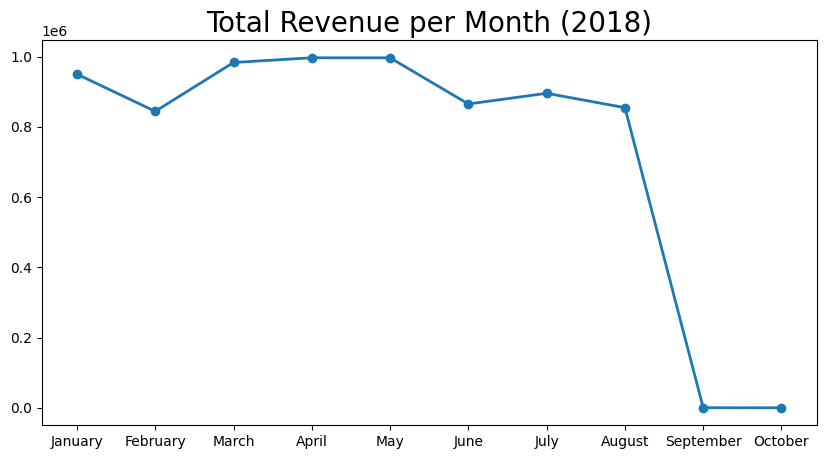

In [ ]:
# visualization of total revenue per month

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_2018["order_purchase_timestamp_y"],
    monthly_orders_2018["revenue"],
    marker='o',
    linewidth=2
)
plt.title("Total Revenue per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### **Pertanyaan 2:** Produk Paling Banyak dan Paling Sedikit Terjual?




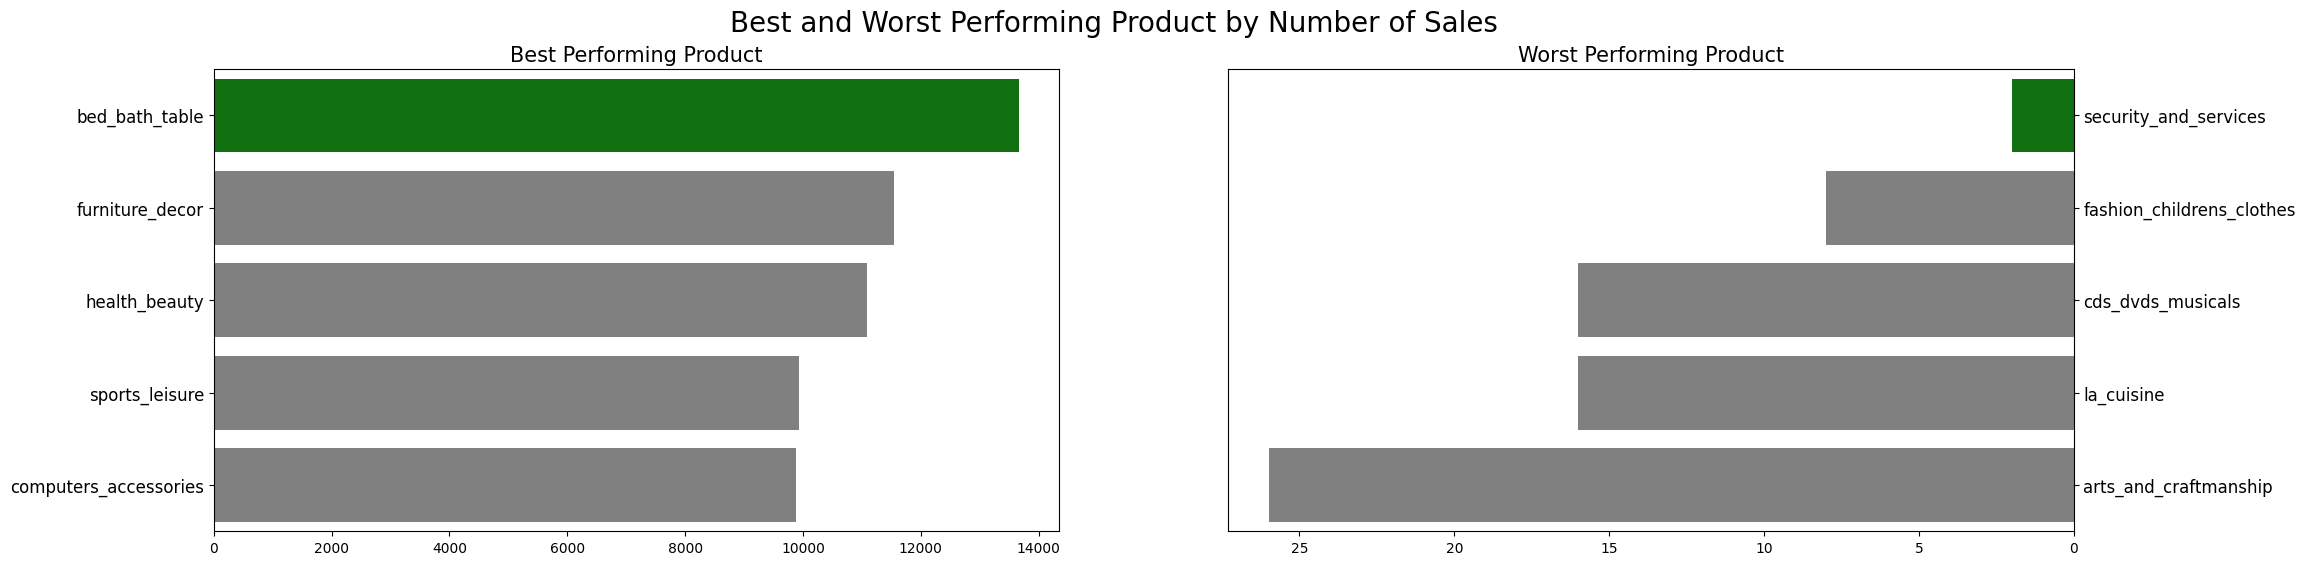

In [ ]:
#visualization for best and worst sales of the product
sum_order_df = all_df.groupby("product_category_name_english").order_item_id.sum().sort_values(ascending=False).reset_index()
#sum_order_df.head()

#Plotting graph for Best and Worst product
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["green", "grey", "grey", "grey", "grey"]

sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("left")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118434 entries, 0 to 118433
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   order_id                         118434 non-null  object        
 1   customer_id_x                    118434 non-null  object        
 2   order_status_x                   118434 non-null  object        
 3   order_purchase_timestamp_x       118434 non-null  datetime64[ns]
 4   order_approved_at_x              118258 non-null  datetime64[ns]
 5   order_delivered_carrier_date_x   116360 non-null  datetime64[ns]
 6   order_delivered_customer_date_x  115037 non-null  datetime64[ns]
 7   order_estimated_delivery_date_x  118434 non-null  datetime64[ns]
 8   delivery_time_x                  118258 non-null  float64       
 9   order_item_id                    117604 non-null  float64       
 10  product_id                       117604 non-

### **Pertanyaan 3:** jenis pembayaran apa yang paling sering digunakan?

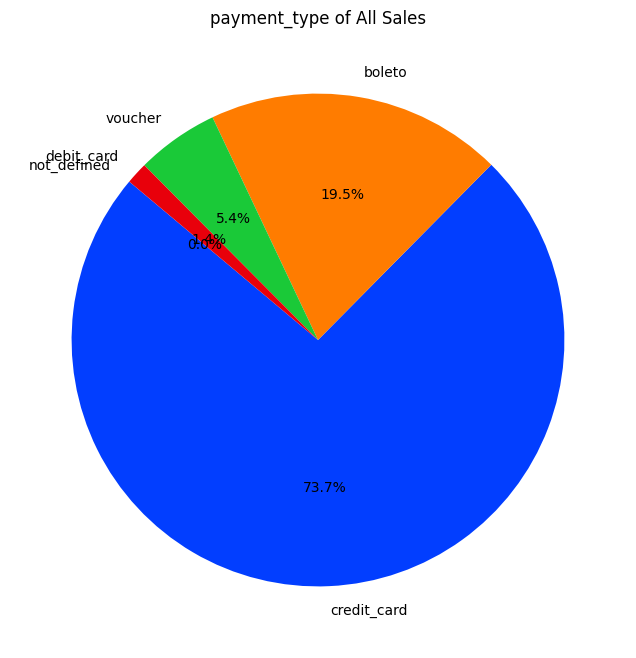

In [ ]:
# Visualization for payment type

# declaring data
data = "payment_type"
value_counts = all_df["payment_type"].value_counts()

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, colors=palette_color, autopct='%1.1f%%', startangle=140)
plt.title(f'{data} of All Sales')
plt.show()

### **Pertanyaan 4:** Performa Pengiriman Barang ?

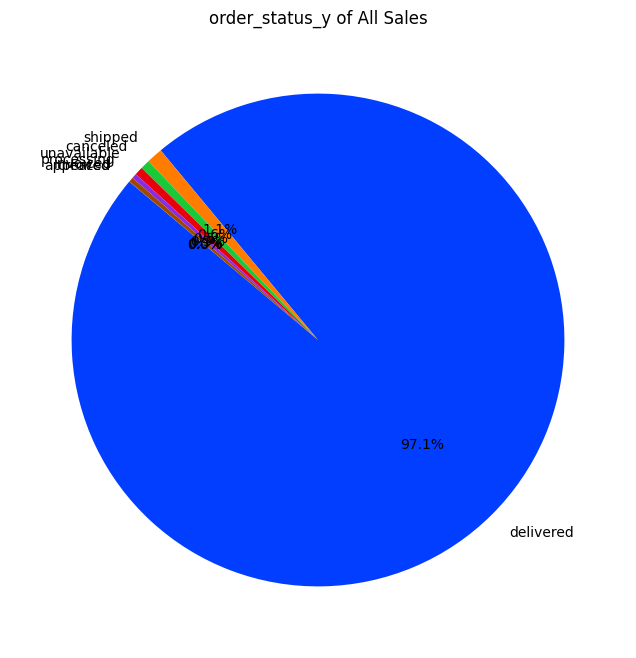

In [ ]:
# Visualization for order status

# declaring data
data = "order_status_y"
value_counts = all_df["order_status_y"].value_counts()

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, colors=palette_color, autopct='%1.1f%%', startangle=140)
plt.title(f'{data} of All Sales')
plt.show()

## Mapping Market Customer

### **Pertanyaan 5:** Persebaran Demografis Pelanggan

<ipython-input-152-ca193bada146>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


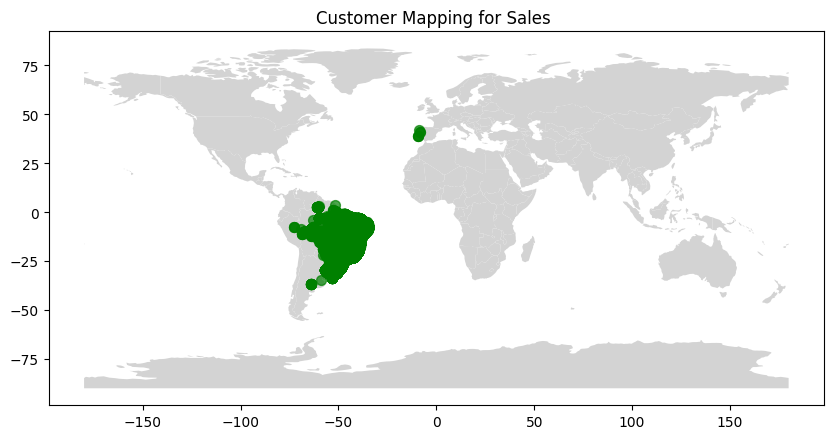

In [ ]:
# Create a GeoDataFrame with example data (latitude, longitude, and a value column)
geometry = gpd.points_from_xy(all_df['geolocation_lng'], all_df['geolocation_lat'])
geo_df = gpd.GeoDataFrame(all_df, geometry=geometry)

# Load a world map GeoDataFrame for background
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the geospatial visualization
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, markersize=50, color="green", alpha=0.7)
plt.title('Customer Mapping for Sales ')
plt.show()

## **Pertanyaan 6,7,8:** RFM Analysis

RFP Analysis Diterapkan untuk menjawab pertanyaan berikut

**- Kapan terakhir pelanggan melakukan transaksi?**

**- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?**

**- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?**

In [ ]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp_x": "max", # taking the last order date
    "order_id": "nunique", # count the amount of orders
    "payment_value": "sum" # count the total revenue
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# calculate the last day customer conducting transactions (days)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = order_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,141.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,27.19,163
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,86.22,586
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,43.62,370
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,196.89,337


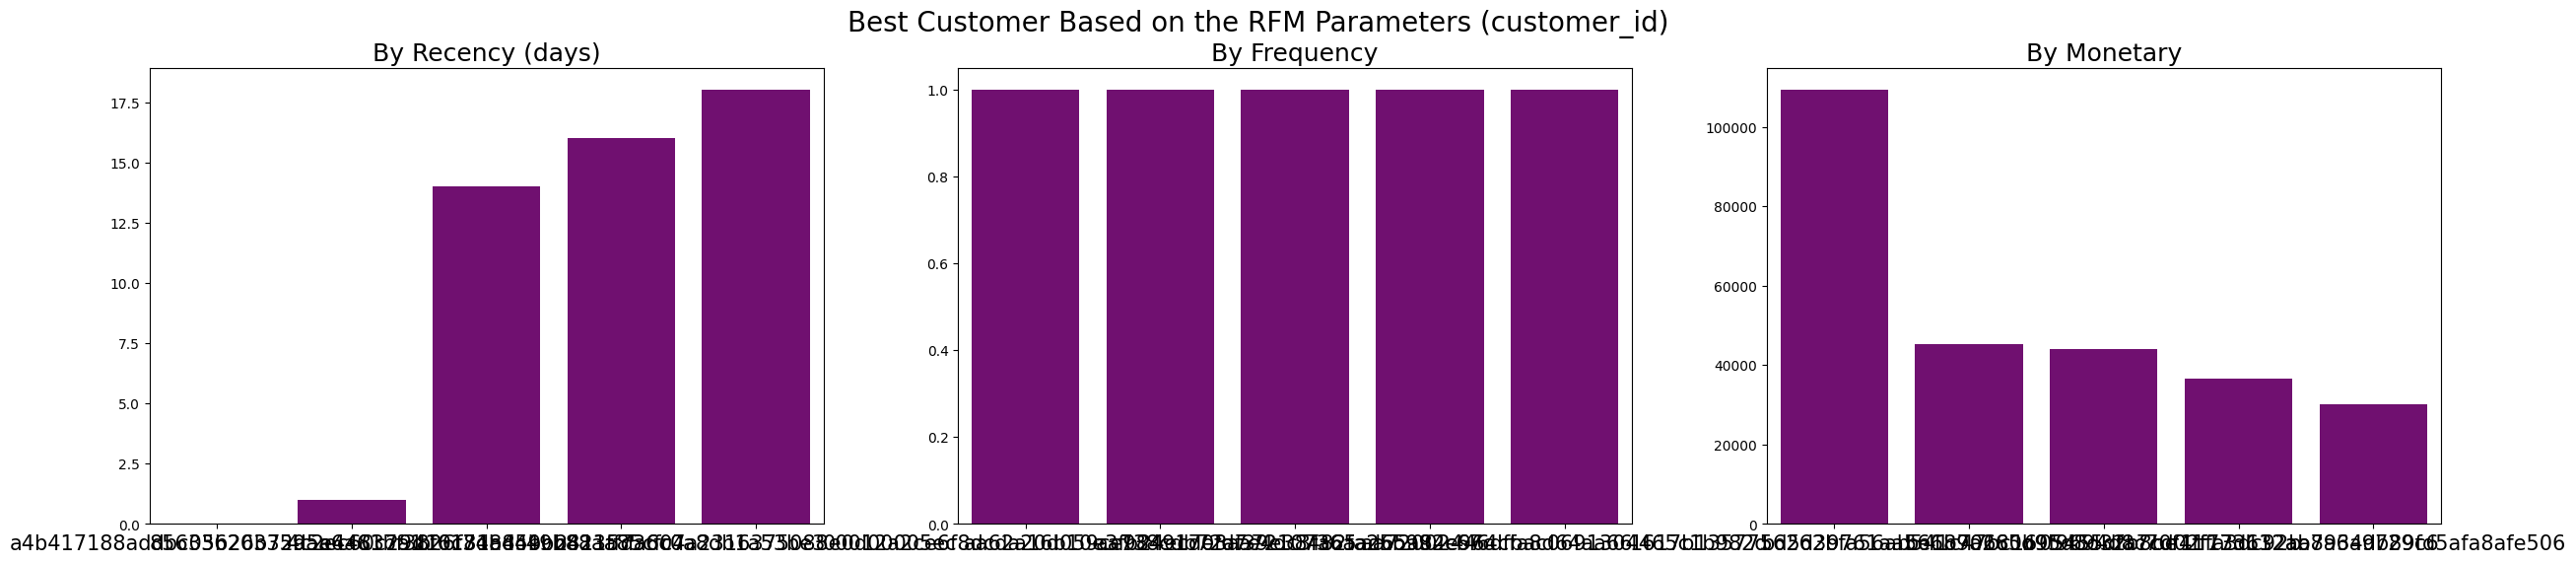

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["purple","purple","purple","purple"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on the RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118434 entries, 0 to 118433
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   order_id                         118434 non-null  object        
 1   customer_id_x                    118434 non-null  object        
 2   order_status_x                   118434 non-null  object        
 3   order_purchase_timestamp_x       118434 non-null  datetime64[ns]
 4   order_approved_at_x              118258 non-null  datetime64[ns]
 5   order_delivered_carrier_date_x   116360 non-null  datetime64[ns]
 6   order_delivered_customer_date_x  115037 non-null  datetime64[ns]
 7   order_estimated_delivery_date_x  118434 non-null  datetime64[ns]
 8   delivery_time_x                  118258 non-null  float64       
 9   order_item_id                    117604 non-null  float64       
 10  product_id                       117604 non-

In [ ]:
all_df

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,delivery_time_x,order_item_id,...,product_category_name_english,payment_type,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,1.0,...,housewares,credit_card,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,-23.574809,-46.587471
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,1.0,...,housewares,voucher,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,-23.574809,-46.587471
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,16.0,1.0,...,housewares,voucher,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,-23.574809,-46.587471
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,18.0,1.0,...,perfumery,boleto,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active,-12.169860,-44.988369
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,27.0,1.0,...,auto,credit_card,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active,-16.746337,-48.514624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,23.0,1.0,...,baby,credit_card,195.00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,Active,-24.001467,-46.446355
118430,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,30.0,1.0,...,home_appliances_2,credit_card,271.01,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,Active,-17.891522,-39.370942
118431,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,37.0,1.0,...,computers_accessories,credit_card,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,Active,-22.555985,-42.690761
118432,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,37.0,2.0,...,computers_accessories,credit_card,441.16,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,Active,-22.555985,-42.690761


In [ ]:
all_df.to_csv("ecommerce_data.csv", index=False)

# Conclusion

## **Pertanyaan 1:** Bagaimana Performa Penjualan Perusahaan?

Analisis dilakukan terhadap performa perusahaan dengan melakukan analisis penjualan bulanan pada masing-masing tahun (2016-2018).
- Data penjualan pada tahun 2016 yang terbatas menunjukkan Hasil visualisasi penjualan hanya dari bulan September hingga Desember. Penjualan pada Oktober menunjukkan hasil yang cukup baik hingga melebihi 300 order, namun performa penjualan pada September, November dan Desember menunjukkan hasil yang buruk dengan penjualan 0. Namun hasil tersebut bisa disebabkan oleh beberapa hal seperti kurangnya data atau faktor lain yang mengakibatkan tidak adanya order yang tercatat.
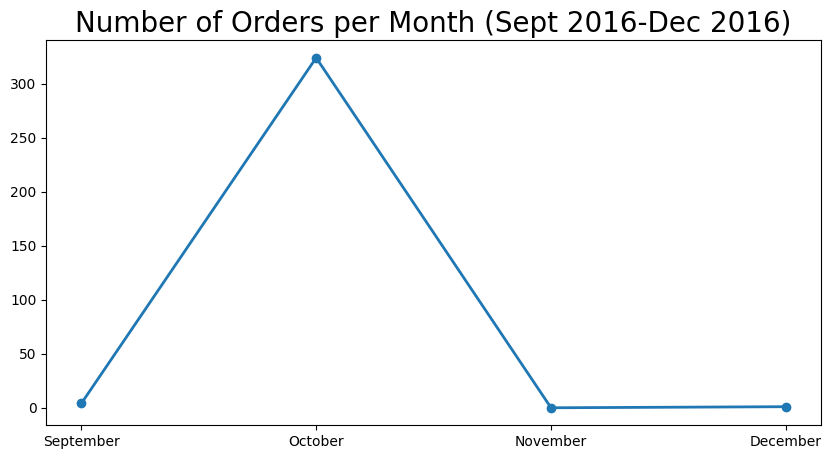

- Data penjualan pada Tahun 2017 menunjukkan performa penjualan yang baik. Hal tersebut ditunjukkan dengan grafik penjualan yang semakin meningkat dari awal tahun yang menunjukkan angka berkisar 900 order, hingga pada akhir tahun yaitu November yang menunjukkan order yang tercatat mencapai lebih dari 7000 order. Namun pada bulan Desember terdapat sedikit penurunan jumlah order menjadi kisaran 5000 order
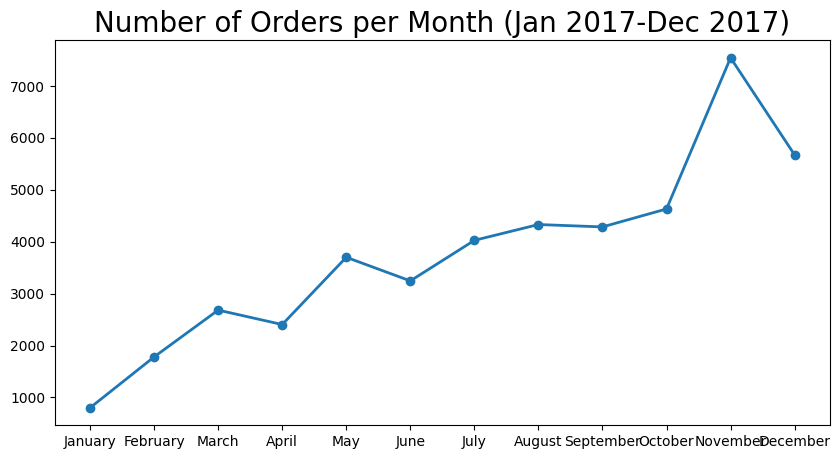

- Grafik visualisasi penjualan pada tahun 2018 menunjukkan order yang kembali meningkat dibandingkan dengan bulan Desember, yaitu pada bulan Januari dimana order yang tercatat mencapat lebih dari 7000 order. Pada bulan selanjutnya penjualan cenderung konsisten dengan hanya terdapat sedikit penurunan, namun tidak mencapai kurang dari 6000 order.
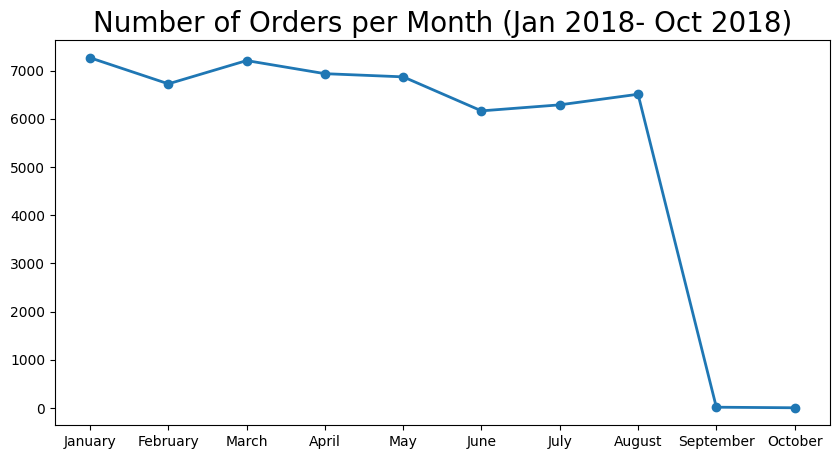

Pada bulan september dan oktober, grafik menunjukkan penurunan order yang drastis. Namun hal ini belum tentu disebabkan oleh performa penjualan yang menurun. Terdapat faktor lainnya yang dapat menyebabkan hal ini terjadi seperti tidak tercatatnya order atau data analisis yang kurang lengkap

## **Pertanyaan 2:** Produk Paling Banyak dan Paling Sedikit Terjual


Grafik visualisasi menunjukkan produk terlaris adalah produk dengan kategori bed_bath_table, yaitu produk terkait tempat tidur, peralatan mandi dan meja. Kemudian Untuk produk yang menunjukkan penjualan paling sedikit adalah produk dengan kategori security_and_services atau produk yang berkaitan dengan keamanan

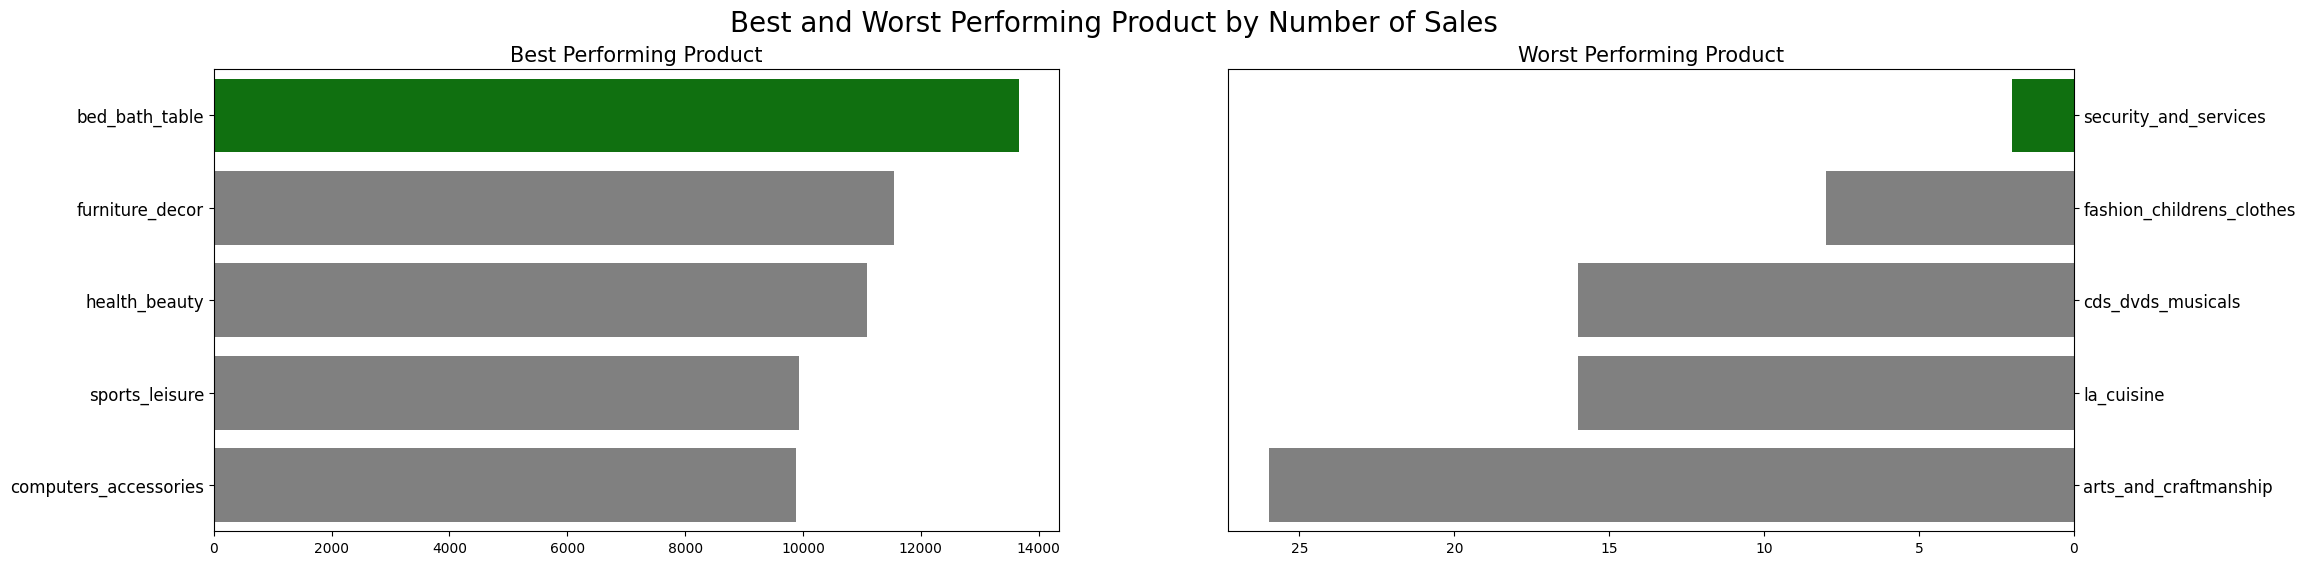

## **Pertanyaan 3:** Jenis Pembayaran Paling Sering Digunakan?

Hasil visualisasi menunjukkan bahwa sistem pembayaran yang paling sering digunakan adalah dengan menggunakan kartu kredit sebanyak 73.7% dan disusul oleh boleto sebanyak 19.5%.
Informasi ini bisa dimanfaatkan sebagai acuan promosi penjualan perusahaan kedepannya, dengan menyasar kepada pelanggan atau calon pelanggan yang merupakan pengguna kartu kredit.
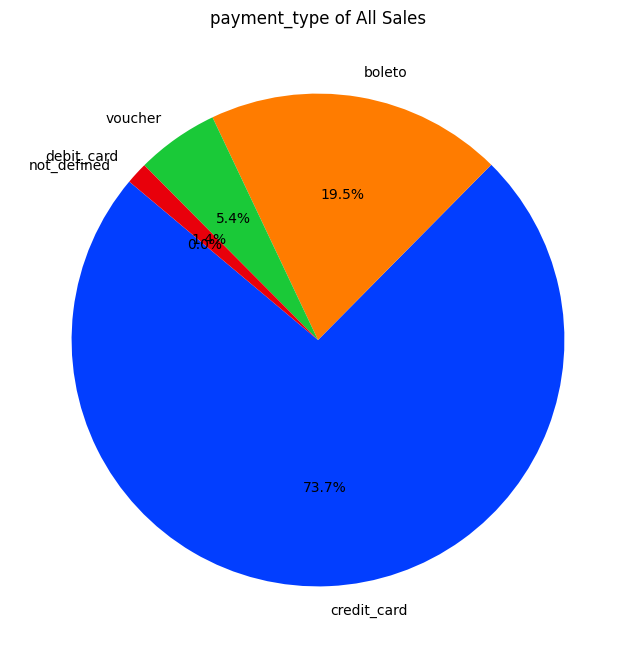

## **Pertanyaan 4:** Performa Pengiriman Barang

Visualisasi menunjukkan status pengiriman barang delivered atau sudah diterima pelanggan mencapai 97.1%. Kemudian pengiriman dengan status shipped atau sedang dikirim yaitu 1.1% dari total order. Serta status unavailable dan canceled kurang dari 1% yang menandakan performa pengiriman yang baik.
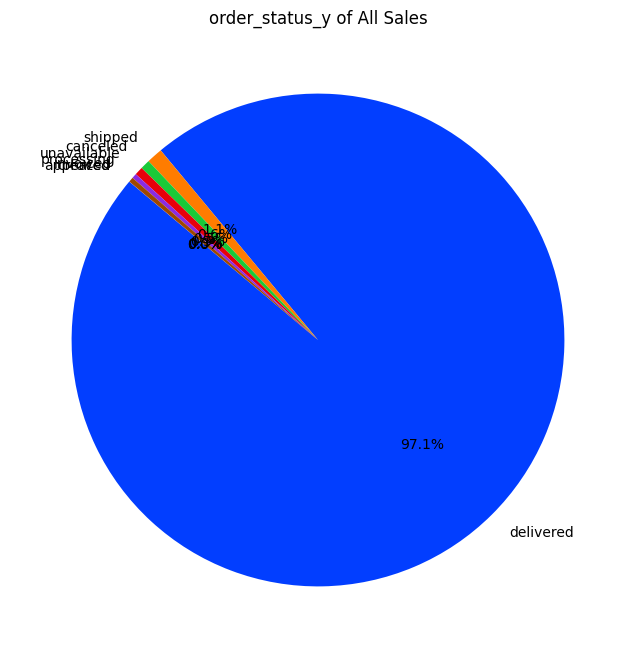

## **Pertanyaan 5:** Bagaimana Persebaran Pelanggan?

Visualisasi menunjukan distribusi pelanggan yang sebagian besar berada di wilayah Brazil dan sisanya tersebar di wilayah sekitar Portugal dan Spanyol
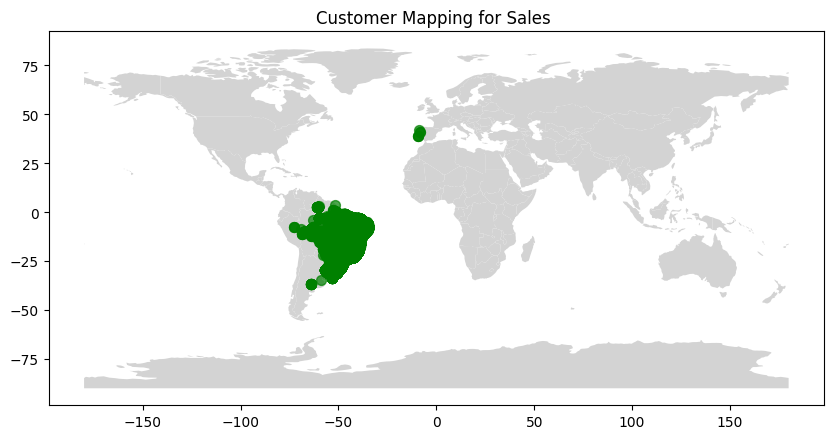

## **Pertanyaan 6,7,8:** RFM Analysis

RFM analysis dapat digunakan untuk mengetahui pertanyaan terkait pelanggan terbaik berdasarkan pertanyaan berikut:


- kapan terakhir seorang pelanggan melakukan transaksi? (recency)

terkait hal ini, dapat dilihat bahwa pelanggan terbaik, melakukan transaksi dalam waktu kurang dari 30 hari bahkan ada yang kurang dari 1 hari

- seberapa sering pelanggan tersebut melakukan transaksi? (frequency)

seluruh sampel pelanggan terbaik menunjukkan frekuensi berbelanja yang serupa dilihat dari grafik yang dihasilkan

- seberapa besar revenue yang berasal dari pelanggan tersebut? (monetary)

hasil analisis mengenai revenue atau pendapatan yang dihasilkan oleh pelanggan menunjukkan pendapatan yang cukup tinggi dari pelanggan tersebut terutama dari pelanggan pada grafik paling kiri

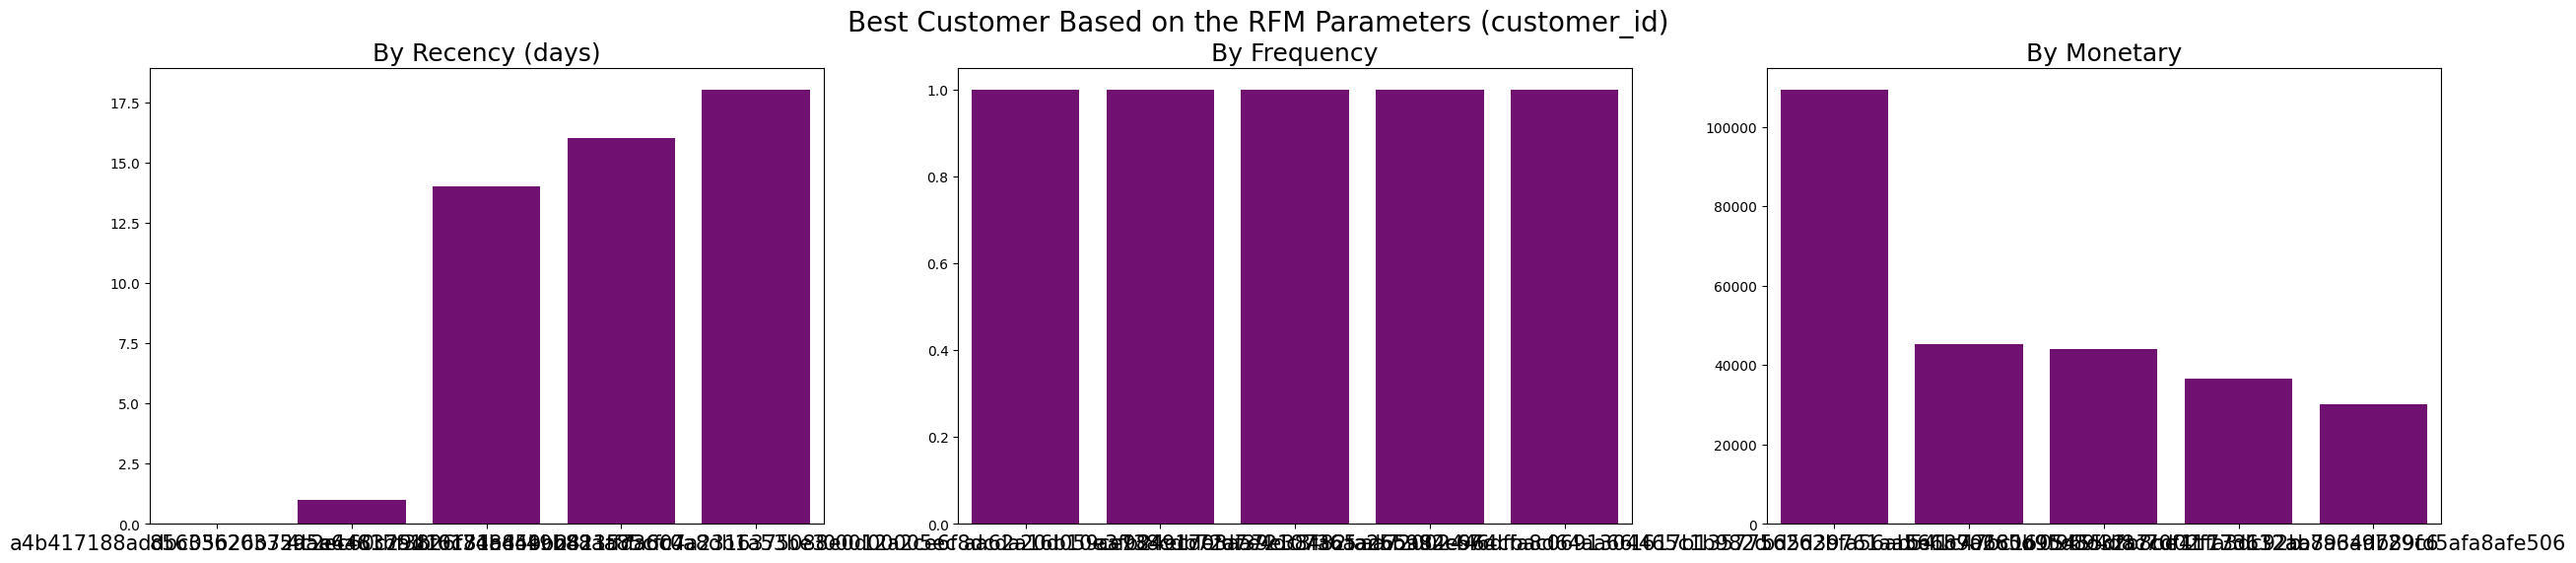

**Thank You ^^**